In [40]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from matplotlib import ticker
#ここから2次元相関
data_file = 'file'
num_contour = 30
pyplot.rcParams["axes.linewidth"] = 1.5
pyplot.rcParams["figure.dpi"] = 100
pyplot.rcParams["figure.figsize"] = (4, 4)
pyplot.rcParams["font.family"] = "serif"
pyplot.rcParams["font.size"] = 12
pyplot.rcParams["xtick.major.width"] = 1.5
pyplot.rcParams["ytick.major.width"] = 1.5
pyplot.rcParams["xtick.minor.width"] = 1.5
pyplot.rcParams["ytick.minor.width"] = 1.5
pyplot.rcParams["xtick.major.size"] = 6
pyplot.rcParams["ytick.major.size"] = 6
pyplot.rcParams["xtick.minor.size"] = 3
pyplot.rcParams["ytick.minor.size"] = 3
pyplot.rcParams["axes.labelpad"] = 8
pyplot.rcParams["xtick.major.pad"] = 12
pyplot.rcParams["ytick.major.pad"] = 12
pyplot.rcParams["xtick.top"] = True
pyplot.rcParams["ytick.right"] = True
pyplot.rcParams["xtick.direction"] = "in"
pyplot.rcParams["ytick.direction"] = "in"

In [43]:
data = pd.read_csv(data_file, header=0, index_col=0)
#data = data.drop(data.columns[65::], axis=1)


z = data.values.T
y = data.columns.astype(float)
x = data.index.astype(float)
zmax = np.absolute(z).max()
data

PermissionError: [Errno 1] Operation not permitted: '/Users/chikamishunta/Desktop/SynologyDrive2/SynologyDrive/PEG-400_5%_p1 (5 second and higher nitrogen flow)/Pickup_spectra.csv'

(0.0, 0.6)

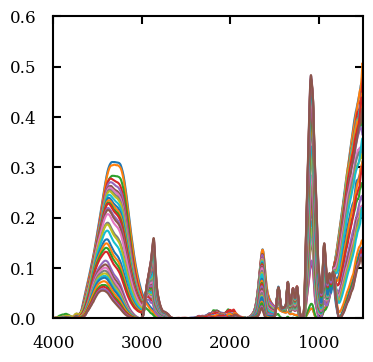

In [24]:
for i in range(len(data.T)):
    pyplot.plot(x, z.T[:, i])
pyplot.xlim(4000, 500)
pyplot.ylim(0, 0.6)

([<matplotlib.axis.XTick at 0x7f8a29565310>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

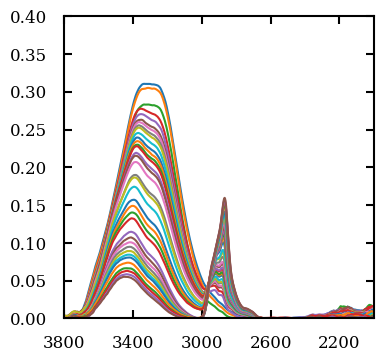

In [25]:
for i in range(len(data.T)):
    pyplot.plot(x, z.T[:, i])

pyplot.xlim(3800, 2000)
pyplot.ylim(0, 0.4)
pyplot.xticks(np.arange(3800, 2000 - 1, -400))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))

#ax.set_ylim(1, 5)
#ax.set_yticks(numpy.arange(1, 5, -1))
#ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))

In [33]:
data =data[2000:3800]
k = data.index.get_loc(data.iloc[:,0].idxmax())
peak_absorbance = data.iloc[k, :]
peak_absorbance

0      0.310620
5      0.304097
49     0.283258
181    0.276411
183    0.269293
190    0.260652
192    0.256631
194    0.251550
195    0.247920
197    0.240421
199    0.232100
200    0.227016
201    0.221467
202    0.218300
203    0.208482
204    0.204491
205    0.194459
207    0.175318
208    0.170833
209    0.157561
211    0.139243
212    0.129982
213    0.120809
214    0.112276
215    0.093427
216    0.085821
217    0.079592
218    0.074256
219    0.068897
220    0.064628
221    0.061184
224    0.054678
226    0.048039
234    0.044666
253    0.040539
812    0.036651
Name: 3333.355, dtype: float64

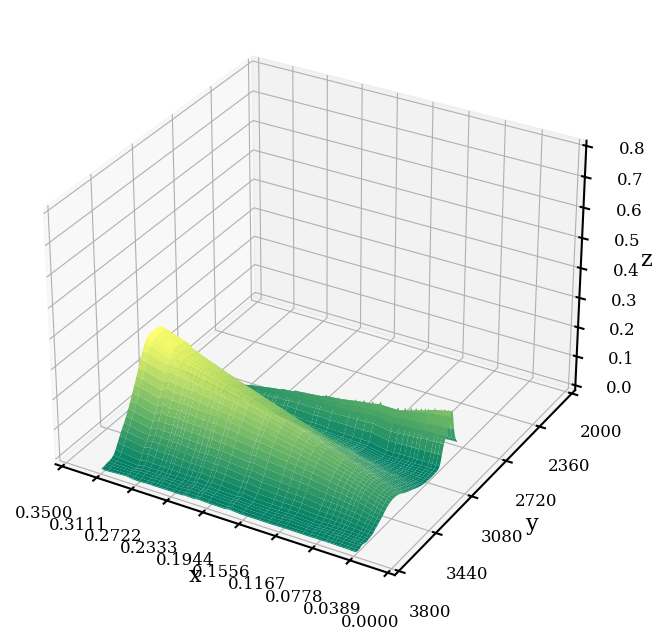

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Figureと3DAxeS
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection="3d")

# 軸ラベルを設定
ax.set_xlabel("x", size = 16)
ax.set_ylabel("y", size = 16)
ax.set_zlabel("z", size = 16)

ax.set_xlim(0.35, 0)
ax.set_ylim(3800, 2000)
ax.set_zlim(0.0, 0.4)

ax.set_xticks(np.linspace(0, 0.35, 10))
ax.set_yticks(np.linspace(3800, 2000, 6))
ax.set_zticks(np.linspace(0.0, 0.8, 9))

# 円周率の定義
pi = np.pi

# (x,y)データを作成
x = peak_absorbance.values
y = data.index.astype(float)

# 格子点を作成
X, Y = np.meshgrid(x, y)

# 高度の計算式
Z = data.values

# 曲面を描画
ax.plot_surface(X, Y, Z, cmap = "summer")

# 底面に等高線を描画
#ax.contour(X, Y, Z, colors = "black", offset = -1)

plt.show()

29

In [10]:
def contour(data):
    x = data.columns[0:].astype(float)
    y = data.index[0:].astype(float)
    z = data.values
    zmax = np.absolute(z).max()
    plt.figure(figsize=(6, 6))
    num_contour = 20
    plt.contour(x, y, z, num_contour, cmap="bwr", vmin=-1 * zmax, vmax=zmax)
    plt.xlim(3800, 2000)
    plt.ylim(0, 250)
    plt.xlabel('Wavenumber ($cm^{-1}$)')
    plt.ylabel('Scan time ($s$)')
    plt.show()

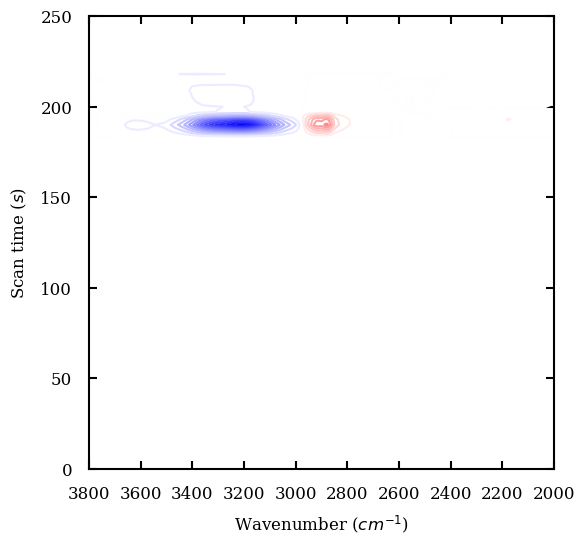

In [11]:
# synchronous PCMW2D correlation

window = 11
sync = np.zeros(data.T.shape)
for i in range (window // 2, len(data.T) - window // 2):
    y = data.T.iloc[i - window // 2 : i + window // 2 + 1]
    y -= y.mean()
    p = y.index.astype(float) - np.mean(y.index.astype(float))
    sync[i] = p @ y / (window - 1)
sync = pd.DataFrame(sync, index=data.T.index, columns= data.T.columns)
contour(sync)

In [12]:
# Hilbert-Noda transformation matrix

from math import pi
noda = np.zeros([window, window])
for i, j in np.ndindex(noda.shape):
    if i != j: noda[i, j] = 1/ pi/ (j - i)

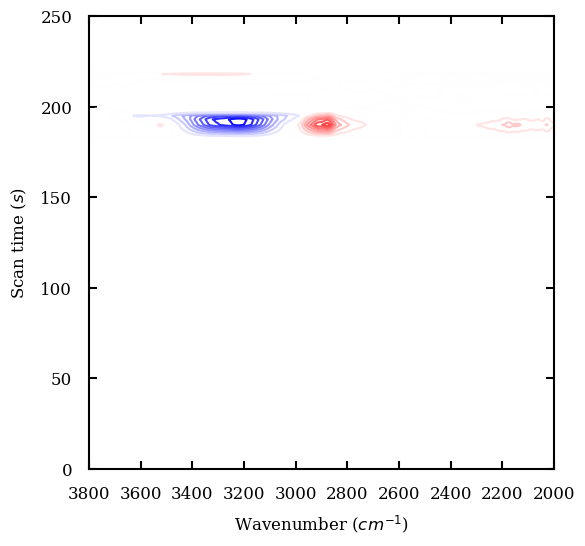

In [13]:
# asynchronous PCMW2D correlation

window = 11
asyn = np.zeros(data.T.shape)
for i in range (window // 2, len(data.T) - window // 2):
    y = data.T.iloc[i - window // 2 : i + window // 2 + 1]
    y -= y.mean()
    p = y.index.astype(float) - np.mean(y.index.astype(float))
    asyn[i] = p @ noda @ y / (window - 1)
asyn = pd.DataFrame(asyn, index=data.T.index, columns= data.T.columns)
contour(asyn)